## IMDB Movie Rating Analysis Project – Brief Overview

**Project Objective:**

The goal of this project is to analyze IMDB movie ratings to identify trends, correlations, and factors influencing movie success. This includes understanding how genres, directors, actors, budget, and release years impact ratings.

**Key Steps:**

**Data Collection:**
+ MDB movie data (ratings, reviews, genres, cast, budget, etc.).
+ Clean and preprocess the dataset.

**Exploratory Data Analysis (EDA):**
+ Analyze rating distributions across different genres and years.
+ Identify correlations between budget, box office revenue, and ratings.
+ Visualize trends using plots and charts.

**Sentiment Analysis:**

+ Perform sentiment analysis on user reviews to see how sentiments affect ratings.

**Tools & Technologies:**

Python: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, NLP (for sentiment analysis).
SQL: For querying large datasets.
Power BI/Tableau: For interactive visualizations.
Web Scraping (Optional): BeautifulSoup/Scrapy to collect data.

**Expected Outcome:**

+ Understanding what factors contribute to high or low movie ratings.
+ Identifying patterns in successful movies.
+ Building a recommendation system or predictive model for movie ratings.

In [1]:
# Import Library
import pandas as pd

In [ ]:
## Importing Datasets

In [2]:
movie = pd.read_csv(r'E:\FSDS With GEN AI_NIT\1st Feb - 28th Feb 2025\15th Feb\Movie_data\movie.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv(r'E:\FSDS With GEN AI_NIT\1st Feb - 28th Feb 2025\15th Feb\Movie_data\rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
tag = pd.read_csv(r'E:\FSDS With GEN AI_NIT\1st Feb - 28th Feb 2025\15th Feb\Movie_data\tag.csv')
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [ ]:
## we don't required timestamp column in our dataset so remove it 

In [ ]:
del rating['timestamp']

In [7]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [10]:
del tag['timestamp']
print(tag.head())

   userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero


In [11]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [19]:
row_0 = tag.iloc[0] #return the row on 0th row
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [20]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [21]:
row_0['userId']

18

In [24]:
'ratings' in row_0 ## check whether ratings column exist in row_0

False

In [25]:
row_0.name

0

In [28]:
row_0 = row_0.rename('Firstrow') #rename column name
row_0.name

'Firstrow'

## Dataframe

In [29]:
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [30]:
tag.index

RangeIndex(start=0, stop=465564, step=1)

In [32]:
tag.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [34]:
tag.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


In [35]:
tag.shape

(465564, 3)

In [38]:
tag[0:1500:100]

,userId,movieId,tag
0,18,4141,Mark Waters
100,121,52973,drugs
200,129,55280,dork people
300,316,45186,Ethan Hunt Should Stop Hogging The Screen!
400,342,4848,pretentious
500,342,55908,entirely dialogue
600,348,608,black comedy
700,348,51773,netflix
800,359,1175,This Would Have Been Funnier If It Was A Horro...
900,359,42418,No Matter What Century It Is Jungle Fever Is V...


In [39]:
len(tag[0:1500:100])

15

## Descriptive Statistics

In [43]:
ratings['rating'].describe() ##Descriptive Statistics for ratings column in ratings table

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [44]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [47]:
ratings['rating'].mean() ## this code provide mean for ratings columns only

3.5255285642993797

In [48]:
ratings.mean() ## this code provide mean for all columns in rating table

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [50]:
ratings['rating'].std()

1.051988919275684

In [51]:
ratings.std()

userId     40038.626653
movieId    19789.477445
rating         1.051989
dtype: float64

In [52]:
ratings['rating'].min()

0.5

In [53]:
ratings['rating'].max()

5.0

In [54]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [55]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


## Applying filters to dataset

In [56]:
filter1 = ratings['rating']>10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [58]:
filter2 = ratings['rating']>0
print(filter2)
filter2.all()

0           True
1           True
2           True
3           True
4           True
            ... 
20000258    True
20000259    True
20000260    True
20000261    True
20000262    True
Name: rating, Length: 20000263, dtype: bool


True

In [59]:
filter2.head(4)

0    True
1    True
2    True
3    True
Name: rating, dtype: bool

In [60]:
ratings[filter2]

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


## Data Cleaning: Handling Missing Data

In [62]:
## Check the shape of movie, tag and rating dataset
print(movie.shape)

(27278, 3)


In [65]:
movie.isnull().any().any() # check if there are any missing (NaN) values in the DataFrame movie

False

we don't have any missing value in movie dataframe.

In [63]:
print(ratings.shape)

(20000263, 3)


In [68]:
ratings.isnull().any().any() # check if there are any missing (NaN) values in the DataFrame ratings

False

no missing value in movie dataframe.


In [69]:
tag.shape

(465564, 3)

In [70]:
tag.isnull().any().any()

True

we have some missing values in tags dataframe

## Drop Missing values from tag Dataframe

In [73]:
tag = tag.dropna()
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [74]:
tag.shape

(465548, 3)

In [75]:
tag.isnull().any().any()

False

There is no missing values in tag after dropping missing ones. Notice the number of lines have reduced.

## Data Visualization

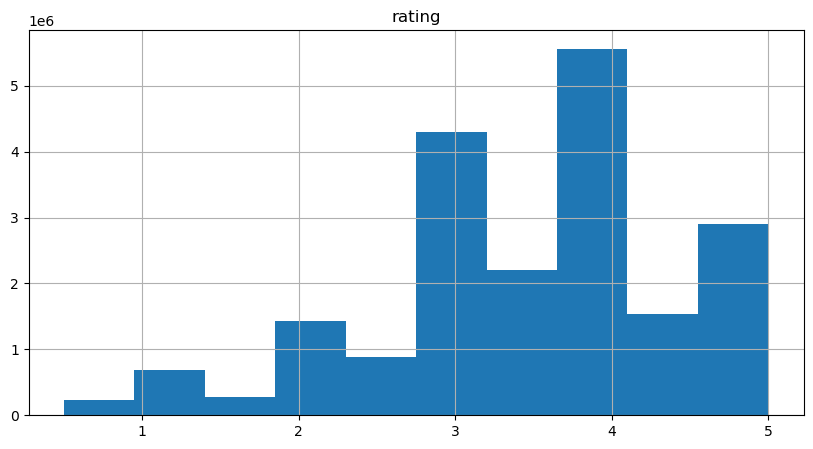

In [90]:
import matplotlib.pyplot as plt

%matplotlib inline

ratings.hist('rating', figsize=(10, 5))
plt.show()

## **Insights**

This graph is a histogram representing the distribution of movie ratings. 

+ X -axis Represents the movie ratings, likely ranging from 1 to 5 (common in rating systems).
+ y-axis Represents the frequency (count) of ratings given by users.

**Observations:**
+ Most ratings are concentrated between 3 and 5.
+ The peak occurs around 4.0, meaning a significant number of movies have been rated close to 4.
+ There are fewer movies with very low ratings (near 1.0).
+ The distribution is slightly right-skewed, indicating that users tend to give higher ratings rather than lower ones.
+ Most users tend to rate movies positively rather than negatively.
+ There may be a bias toward higher ratings due to user preference, review culture, or platform effects.
+ The presence of peaks suggests common rating patterns, possibly due to user behavior or rating system constraints.

## Plotting Box plot for rating columns

<Axes: >

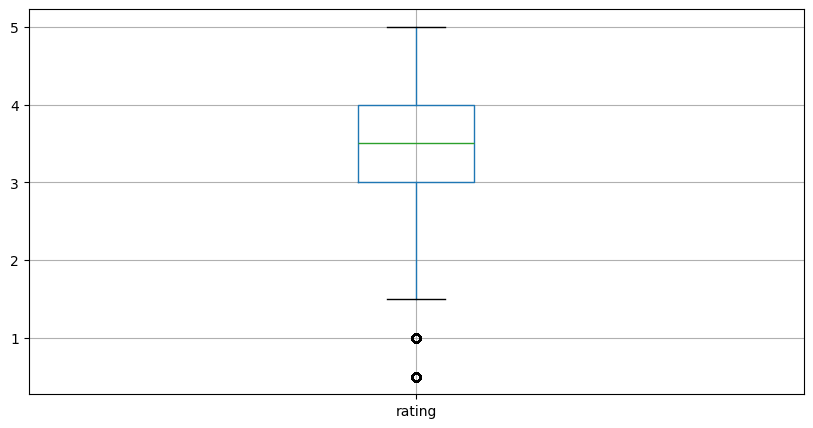

In [92]:
ratings.boxplot(column='rating', figsize = (10,5))

## Observation:

+ Minimum value is at 0.5
+ maximum value is at 5
+ The median rating is around 3.5 - 4.0, meaning most users rate movies positively.
+ Ratings between ~2.0 and 5.0 are common, while ratings below 2.0 are rare (outliers).
+ There is some left-skewness (more low-rating outliers than high-rating outliers).

**Insights:**
+ Most movies receive ratings between 3 and 5, which aligns with general user behavior (people tend to rate movies favorably).
+ There are some extremely low ratings, but they are relatively uncommon.
+ This box plot suggests a positive user bias in rating behavior.

## Slicing Out Columns

In [94]:
tag['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [96]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [97]:
movie[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [98]:
ratings[-10:]# retrieves the last 10 rows of the ratings DataFrame.

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [99]:
tag_counts = tag['tag'].value_counts()
tag_counts

tag
sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
Paul Adelstein                      1
the wig                             1
killer fish                         1
genetically modified monsters       1
topless scene                       1
Name: count, Length: 38643, dtype: int64

In [101]:
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

In [103]:
tag_counts = tag['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

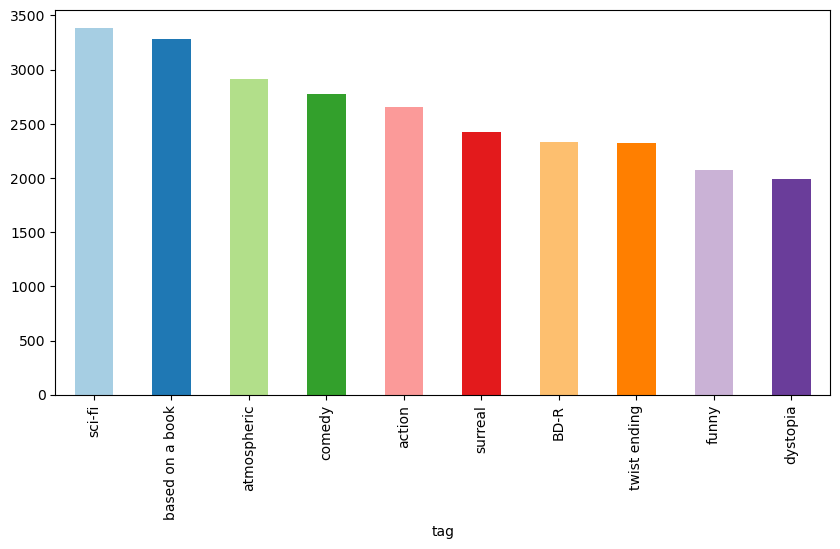

In [110]:
import numpy as np
# Generate bar colors from a colormap
colors = plt.cm.Paired.colors
tag_counts[:10].plot(kind='bar', figsize=(10,5),color=colors)
plt.show()

**Insight:**

+ Sci-fi (3500) and based on a book (3000) are the most prominent, suggesting strong audience or creator preference for these themes.
+ Atmospheric (2500) and comedy (2000) follow, indicating moderate popularity.
+ Values drop sharply from "action" (1500) to "surreal" (1000), "BD-R" (500), and "twist ending" (0).
+ dystopia has very less audiance preference than others.